In [1]:
import glob

train_path = "./db_dep/train/"
train_files = glob.glob(train_path + "person-*/*.png")

In [19]:
print(train_files)

['./db_dep/train/person-4/frame11_dep.png', './db_dep/train/person-7/frame11_dep.png', './db_dep/train/person-3/frame11_dep.png', './db_dep/train/person-26/frame11_dep.png', './db_dep/train/person-8/frame11_dep.png', './db_dep/train/person-23/frame11_dep.png', './db_dep/train/person-28/frame11_dep.png', './db_dep/train/person-11/frame11_dep.png', './db_dep/train/person-15/frame11_dep.png', './db_dep/train/person-21/frame11_dep.png', './db_dep/train/person-5/frame11_dep.png', './db_dep/train/person-12/frame11_dep.png', './db_dep/train/person-13/frame11_dep.png', './db_dep/train/person-6/frame11_dep.png', './db_dep/train/person-14/frame11_dep.png', './db_dep/train/person-22/frame11_dep.png', './db_dep/train/person-25/frame11_dep.png', './db_dep/train/person-9/frame11_dep.png', './db_dep/train/person-24/frame11_dep.png', './db_dep/train/person-2/frame11_dep.png']


In [4]:
average_image = np.zeros((120, 116), dtype = np.int)
sum_image = np.zeros_like(average_image)
batch_size = 1

In [46]:
import numpy as np

k = 1
def merge_to_one(image, img_idx):
    global sum_image, average_image, k
    if img_idx == 0:
        average_image = np.zeros_like(average_image)
    sum_image += np.asarray(image)
    print(np.asarray(image)[0,0], image.getpixel((0,0)))
    if img_idx % batch_size == 0:
        average_image = k * (average_image + sum_image / batch_size)
        k = 0.5
        average_image = average_image.astype(np.byte)
        print("element (0,0):", average_image[0,0])
        sum_image = np.zeros_like(average_image)
    return average_image
    

./db_dep/train/person-4/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


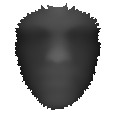

./db_dep/train/person-7/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


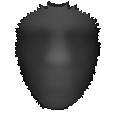

./db_dep/train/person-3/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


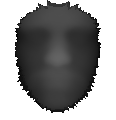

./db_dep/train/person-26/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


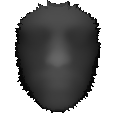

./db_dep/train/person-8/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


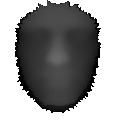

./db_dep/train/person-23/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


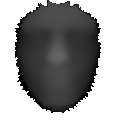

./db_dep/train/person-28/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


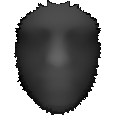

./db_dep/train/person-11/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


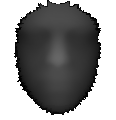

./db_dep/train/person-15/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


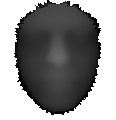

./db_dep/train/person-21/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


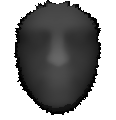

./db_dep/train/person-5/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


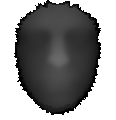

./db_dep/train/person-12/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


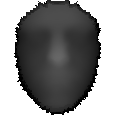

./db_dep/train/person-13/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


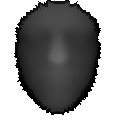

./db_dep/train/person-6/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


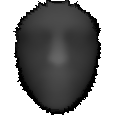

./db_dep/train/person-14/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


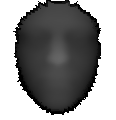

./db_dep/train/person-22/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


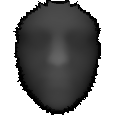

./db_dep/train/person-25/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


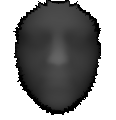

./db_dep/train/person-9/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


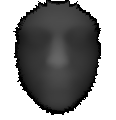

./db_dep/train/person-24/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


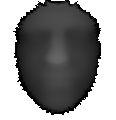

./db_dep/train/person-2/frame11_dep.png PNG (116, 120)xL
255 255
element (0,0): -1


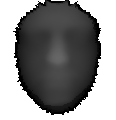

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int8)

In [39]:
import sys
from PIL import Image

img_idx = 0
for infile in train_files:
    try:
        with Image.open(infile) as im:
            if im.mode != "L":
                print("Expected 8-bit pixels, black and white image. Exiting...")
                exit(1)
            print(infile, im.format, f"{im.size}x{im.mode}")
            av_img = merge_to_one(im, img_idx)
            img_idx += 1
            pil_img = Image.fromarray(av_img, mode="L")
            display(pil_img)
    except OSError:
        pass
display(av_img)

255 255
element (0,0): 0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


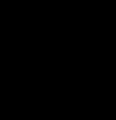

0 0
element (0,0): 0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255 255
element (0,0): 0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
img1 = Image.new("L", (116, 120), "white")
img2 = Image.new("L", (116, 120), "black")
av_img = merge_to_one(img1, 0)
print(av_img)
display(Image.fromarray(np.floor(np.asarray(img1)+100).astype(np.byte), mode="L"))
av_img = merge_to_one(img2, 1)
print(av_img)
av_img = merge_to_one(img1, 2)
print(av_img)

In [45]:
current_pixels = np.argwhere(av_img > 0)
print(av_img[current_pixels])

[[[-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]]

 [[-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]]

 [[-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]]

 ...

 [[-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]]

 [[-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]]

 [[-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]]]


[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]]


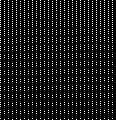

In [179]:
print(av_img)
display(Image.fromarray(av_img, mode="L"))